In [4]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Read Data

In [5]:
dataHealth = pd.read_csv("healthcare.csv") 

In [6]:
dataHealth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240 entries, 0 to 1239
Data columns (total 7 columns):
District          1240 non-null int64
Region            1240 non-null object
Spendtype         1240 non-null object
PerCapGDP         1240 non-null float64
AvgCancerSpend    1240 non-null float64
AvgHeartSpend     1240 non-null float64
AvgOrganSpend     1240 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 67.9+ KB


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Correlation, Plots

In [8]:
dataHealth.corr()

,District,PerCapGDP,AvgCancerSpend,AvgHeartSpend,AvgOrganSpend
District,1.000000,0.260106,0.521103,0.315772,0.336290
PerCapGDP,0.260106,1.000000,0.779721,0.242116,0.300921
AvgCancerSpend,0.521103,0.779721,1.000000,0.323643,0.327478
AvgHeartSpend,0.315772,0.242116,0.323643,1.000000,0.350827
AvgOrganSpend,0.336290,0.300921,0.327478,0.350827,1.000000


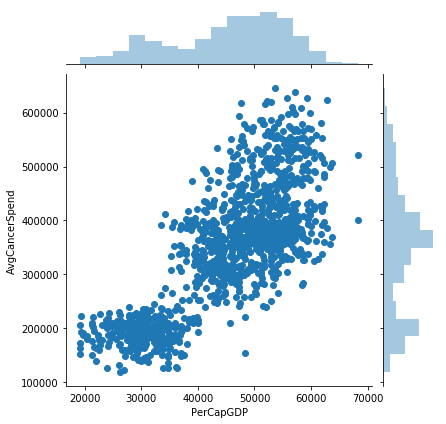

In [9]:
sns.jointplot(dataHealth.PerCapGDP, dataHealth.AvgCancerSpend )

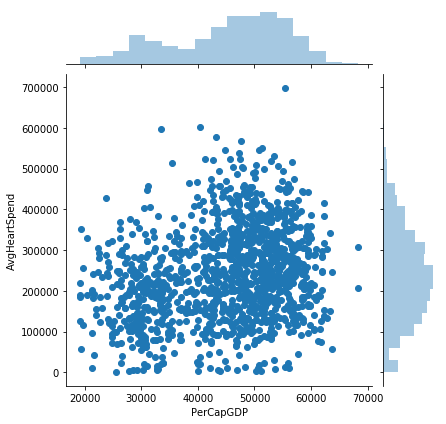

In [10]:
sns.jointplot(dataHealth.PerCapGDP, dataHealth.AvgHeartSpend )

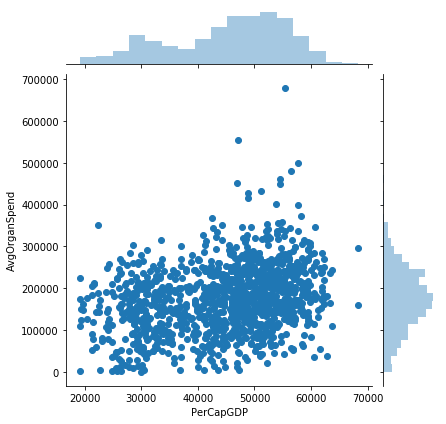

In [11]:
sns.jointplot(dataHealth.PerCapGDP, dataHealth.AvgOrganSpend )

# Regression

In [10]:
import statsmodels.api as sm
from __future__ import print_function
from patsy import dmatrices

In [11]:
from statsmodels.formula.api import ols
model1 = ols('AvgCancerSpend ~ PerCapGDP', data=dataHealth).fit()

In [12]:
model2 = ols('AvgHeartSpend ~ PerCapGDP', data=dataHealth).fit()
model3 = ols('AvgOrganSpend ~ PerCapGDP', data=dataHealth).fit()

In [13]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:         AvgCancerSpend   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     1920.
Date:                Tue, 30 Oct 2018   Prob (F-statistic):          5.38e-254
Time:                        09:32:57   Log-Likelihood:                -15637.
No. Observations:                1240   AIC:                         3.128e+04
Df Residuals:                    1238   BIC:                         3.129e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -4.52e+04   9193.110     -4.917      0.0

In [14]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          AvgHeartSpend   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     77.09
Date:                Tue, 30 Oct 2018   Prob (F-statistic):           5.33e-18
Time:                        09:32:57   Log-Likelihood:                -16154.
No. Observations:                1240   AIC:                         3.231e+04
Df Residuals:                    1238   BIC:                         3.232e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.21e+05    1.4e+04      8.670      0.0

In [15]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:          AvgOrganSpend   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     123.3
Date:                Tue, 30 Oct 2018   Prob (F-statistic):           2.27e-27
Time:                        09:32:58   Log-Likelihood:                -15680.
No. Observations:                1240   AIC:                         3.136e+04
Df Residuals:                    1238   BIC:                         3.137e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.266e+04   9518.764      7.634      0.0

In [16]:
healthpred1 = model1.predict()
print(healthpred1)

[432727.10362459 342283.11673075 368412.49082916 ... 458369.65275627
 430751.44187147 437937.20863438]


In [17]:
dataHealth['healthPred1'] = healthpred1
dataHealth['healthRes1'] = model1.resid
dataHealth.head()

,District,Region,Spendtype,PerCapGDP,AvgCancerSpend,AvgHeartSpend,AvgOrganSpend,healthPred1,healthRes1
0,1,North,public,54822.32372,327230.5621,386820.15260,357833.61270,432727.103625,-105496.541525
1,2,North,public,44447.65969,289474.5850,441519.43650,217274.73060,342283.116731,-52808.531731
2,3,North,public,47444.91232,335908.4809,245678.66140,204289.50160,368412.490829,-32504.009929
3,4,North,public,40322.25256,310200.5836,19823.74664,36939.63255,306318.745517,3881.838083
4,5,North,public,49366.17764,307658.3998,176147.35100,215513.14590,385161.649638,-77503.249838


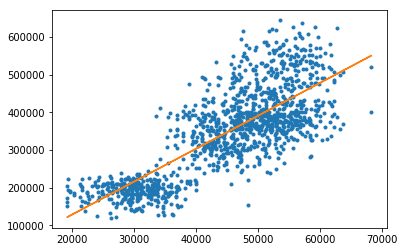

In [18]:
import matplotlib.pyplot as plt

plt.plot(dataHealth.PerCapGDP, dataHealth.AvgCancerSpend, '.')
plt.plot(dataHealth.PerCapGDP, dataHealth.healthPred1, '-')
plt.show()

# Regression with Categorical Variable

In [19]:
model2 = ols('AvgCancerSpend ~ PerCapGDP + C(Spendtype)', data=dataHealth).fit()

In [20]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:         AvgCancerSpend   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     1303.
Date:                Tue, 30 Oct 2018   Prob (F-statistic):          3.33e-305
Time:                        09:32:59   Log-Likelihood:                -15514.
No. Observations:                1240   AIC:                         3.103e+04
Df Residuals:                    1237   BIC:                         3.105e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.45

In [21]:
model3 = ols('AvgCancerSpend ~ PerCapGDP + C(Spendtype) + C(Region)', data=dataHealth).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:         AvgCancerSpend   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     1404.
Date:                Tue, 30 Oct 2018   Prob (F-statistic):               0.00
Time:                        09:32:59   Log-Likelihood:                -15039.
No. Observations:                1240   AIC:                         3.009e+04
Df Residuals:                    1234   BIC:                         3.012e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               2.25

In [22]:
model3 = ols('AvgCancerSpend ~ PerCapGDP + C(Region)', data=dataHealth).fit()

In [23]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:         AvgCancerSpend   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     1097.
Date:                Tue, 30 Oct 2018   Prob (F-statistic):               0.00
Time:                        09:32:59   Log-Likelihood:                -15277.
No. Observations:                1240   AIC:                         3.056e+04
Df Residuals:                    1235   BIC:                         3.059e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.952e+05   1.05

In [24]:
model4 = ols('AvgCancerSpend ~ PerCapGDP + C(Spendtype) + C(Region) + C(Spendtype)*C(Region)', data=dataHealth).fit()

In [25]:
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:         AvgCancerSpend   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     1806.
Date:                Tue, 30 Oct 2018   Prob (F-statistic):               0.00
Time:                        09:33:00   Log-Likelihood:                -14639.
No. Observations:                1240   AIC:                         2.930e+04
Df Residuals:                    1231   BIC:                         2.934e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [26]:
model2 = ols('AvgCancerSpend ~ PerCapGDP+C(Region)', data=dataHealth).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:         AvgCancerSpend   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     1097.
Date:                Tue, 30 Oct 2018   Prob (F-statistic):               0.00
Time:                        09:33:00   Log-Likelihood:                -15277.
No. Observations:                1240   AIC:                         3.056e+04
Df Residuals:                    1235   BIC:                         3.059e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.952e+05   1.05

In [27]:
model3 = ols('AvgHeartSpend ~ PerCapGDP + C(Region)', data=dataHealth).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:          AvgHeartSpend   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     30.93
Date:                Tue, 30 Oct 2018   Prob (F-statistic):           1.42e-24
Time:                        09:33:01   Log-Likelihood:                -16132.
No. Observations:                1240   AIC:                         3.227e+04
Df Residuals:                    1235   BIC:                         3.230e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.906e+05    2.1

In [35]:
model3 = ols('AvgOrganSpend ~ PerCapGDP + C(Region)', data=dataHealth).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:          AvgOrganSpend   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     39.50
Date:                Tue, 30 Oct 2018   Prob (F-statistic):           3.66e-31
Time:                        11:25:13   Log-Likelihood:                -15664.
No. Observations:                1240   AIC:                         3.134e+04
Df Residuals:                    1235   BIC:                         3.136e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.223e+05   1.44

In [39]:
model14 = ols('AvgCancerSpend ~C(Spendtype)+C(Region)', data=dataHealth).fit()
print(model14.summary())

                            OLS Regression Results                            
Dep. Variable:         AvgCancerSpend   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     1756.
Date:                Tue, 30 Oct 2018   Prob (F-statistic):               0.00
Time:                        11:28:03   Log-Likelihood:                -15039.
No. Observations:                1240   AIC:                         3.009e+04
Df Residuals:                    1235   BIC:                         3.011e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               2.21

In [40]:
model15 = ols('AvgHeartSpend ~C(Spendtype)+C(Region)', data=dataHealth).fit()
print(model15.summary())

                            OLS Regression Results                            
Dep. Variable:          AvgHeartSpend   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     69.37
Date:                Tue, 30 Oct 2018   Prob (F-statistic):           5.02e-53
Time:                        11:28:35   Log-Likelihood:                -16066.
No. Observations:                1240   AIC:                         3.214e+04
Df Residuals:                    1235   BIC:                         3.217e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                2.1

In [41]:
model14 = ols('AvgOrganSpend ~C(Spendtype)+C(Region)', data=dataHealth).fit()
print(model14.summary())

                            OLS Regression Results                            
Dep. Variable:          AvgOrganSpend   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     60.58
Date:                Tue, 30 Oct 2018   Prob (F-statistic):           9.19e-47
Time:                        11:29:12   Log-Likelihood:                -15627.
No. Observations:                1240   AIC:                         3.126e+04
Df Residuals:                    1235   BIC:                         3.129e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                1.5

In [43]:
model14 = ols('AvgOrganSpend ~C(Spendtype)+C(Region)+C(Spendtype)*C(Region)', data=dataHealth).fit()
print(model14.summary())

                            OLS Regression Results                            
Dep. Variable:          AvgOrganSpend   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     44.24
Date:                Tue, 30 Oct 2018   Prob (F-statistic):           5.37e-56
Time:                        12:15:40   Log-Likelihood:                -15600.
No. Observations:                1240   AIC:                         3.122e+04
Df Residuals:                    1232   BIC:                         3.126e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------